# Research Notebook
## Arthana Sri Renganathan
## Date: January 26 - February 6, 2026

# 1: Experience
## Describe at least one research activity you worked on this week. 

- Fixed the baryon potential function to accept arguments r and theta and extend to r > r_max
- I wrote some code very similar to the above model, called the Hernquist model. This was applied after our supervisors found a newly released paper [1] on our research.
- The Hernquist rotation curve was compared to the Baryonic component of the rotation curve and then the Hernquist baryon potential function was calculated and compared against the integrated baryon potential we created in our first task.
- These models were then tested in the Jeans profile to test how robust they were.

## Motivation:

This new Hernquist model will allow us to further add value to the research paper that was recently released. The authors in the paper used a 1D Jeans model, whereas we will use a 2D model. Once we test how well this new model works with Jeans, we can then combine all the functions into a couple of well-structured functions and create a .py file.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

The following equation was given for the Hernquist model for rotation curves:

\begin{equation}
vc_{Hernquist} = \frac{\sqrt(G * M_b * r)}{(r + a)}
\tag{1}
\end{equation}

Where G  = 4.30091e-6 in units (kpc * (km/s)^2) / solar mass. We needed to optimize this model with the baryonic mass contribution to the rotation curve data. To do this, we used the curve_fit tool from scipy. This ends up giving two parameters: M_b and a that will effectively model the fit to the data provided from SPARC. Then, from this, we can determine the baryon potential function, but this time using the Hernquist profile instead of the integrated baryon function. The equation given for this is the following:

\begin{equation}
Phi_{b(r)} = \frac{-GM_b}{(r + a)}
\tag{2}
\end{equation}

Where M_b is in units of solar masses, and a is in kpc. Below, I have given the code used to determine the Hernquist rotation curve fit and the Hernquist baryon potential specifically for the galaxy F568-3, so we could compare results with our supervisors.

__Hernquist Code__ (written by myself and the AI tool ChatGPT[2])

    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
    
    r_data = np.asarray(df['Rad'])
    v_data = np.asarray(Vbaryon)
    
    mask = (r_data > 0) & np.isfinite(v_data)
    r_data = r_data[mask]
    v_data = v_data[mask]
    
    # Hernquist rotation curve model
    def vc_hernquist(r, M_b, a):
        return np.sqrt(G * M_b * r) / (r + a)
    
    # Initial guess
    M_b_guess = 6e10
    a_guess   = 28
    
    p0 = [M_b_guess, a_guess]
    bounds = ([0.0, 0.0], [np.inf, np.inf])
    
    # Fit----------------------------------------------------------------
    popt, pcov = curve_fit(vc_hernquist,r_data,v_data,p0=p0,bounds=bounds)
    
    M_b_fit, a_fit = popt
    
    print("Parameters:")
    print(f"M_b = {M_b_fit:.3e} Msun")
    print(f"a   = {a_fit:.3f} kpc")
    
    # Plot baryonic RC and Hernquist fit----------------------------------
    r_model = np.linspace(r_data.min(), 1000, 500)
    v_model = vc_hernquist(r_model, M_b_fit, a_fit)
    
    plt.figure(figsize=(8,3))
    plt.plot(r_data, v_data,  'o',color='C3', label='Baryonic Total')
    plt.plot(r_model, v_model, ls='--',color='black', label='Hernquist fit')
    
    plt.xlabel(f"Radius ({units.at[0,'Rad']})")
    plt.ylabel("Velocity (km/s)")
    plt.title(f"Hernquist Fit to Baryonic Rotation Curve ({Dataset})")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Hernquist potential--------------------------------------------------
    
    def phiH(Mb, a):
        def Phi_hernquist(r, th):
            r = np.asarray(r)
            return -G * Mb / (r + a)
        return Phi_hernquist
    
    Phi_hernquist = phiH(M_b_fit, a_fit)
    #def Phi_hernquist(r,th):
       # return -G * M_b_fit / (r + a_fit)
    
    r_compare = np.linspace(r_min, r_max, 300)
    
    Phi_spline = Phi_baryon(r_compare, 0)
    Phi_hern   = Phi_hernquist(r_compare,0)
    
    # Normalize both so Phi(r_max) = 0--------------------------------------
    Phi_spline -= Phi_spline[-1]
    Phi_hern   -= Phi_hern[-1]

    # Plot potential---------------------------------------------------------
    plt.figure(figsize=(8,4))
    plt.plot(r_compare, Phi_spline,label='Integrated baryonic Φ', color='C0')
    plt.plot(r_compare, Phi_hern, '--', label='Hernquist Φ', color='black')
    
    plt.axvline(r_max, ls='--', color='k', alpha=0.5)
    plt.xlabel(f"Radius ({units.at[0,'Rad']})")
    plt.ylabel(r"Baryonic Potential ($\mathrm{km^2\,s^{-2}}$)")
    plt.title(f"Baryonic Potential Comparison ({Dataset})")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    #inspect.signature(Phi_hernquist)

This experience was quite similar to determining the baryon potential code, but some trial and error was required to determine the M_b and a values. The code essentially uses a rotation curve formula for the Hernquist model and a nested function of the Hernquist model (like the baryon potential function), and plots both. The next step is to test it in the Jeans model, and it worked well, as my peers and supervisor got similar results. The Jeans code is provided below.

__Jeans Input Model Code__ (given to me by my supervisor)

    r1 = 10 # kpc
    M200 = 2e11 # solar masses
    c = 10 # concentration parameter
    
    #Phi_values = Phi_hernquist(r_model,0)
    
    profile = jeans.squashed(r1, M200, c, Phi_b=Phi_hernquist,rmin_baryon=r_min * 1.01,rmin_halo=r_min * 1.01,verbose=True)
    
    if profile:
        print("Jeans profile was computed successfully!")
__Jeans Plot Code__ (given to me by my supervisor)

    plt.figure(figsize=(6,4))
    plt.errorbar(df['Rad'], df['Vobs'], yerr=df['errV'], fmt='o', label='Observed', color='black', markersize=5)
    plt.plot(df['Rad'], profile.V(df['Rad'], Lmax=0), label='Jeans Model', color='C0')
    
    plt.xlabel(f"Radius ({units.at[0, 'Rad']})")
    plt.ylabel(f"Velocity ({units.at[0, 'Vobs']})")
    plt.title(f"Rotation Curve for {Dataset} (Distance: {dist} Mpc)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# 3: So what? (What does it mean?)
## Describe your results
The following model should be a better representation of the original baryon potential function determined last week. We can then implement this ti the Jeans model and apply it for all galaxies. For the Hernquist code, I received the following outputs:

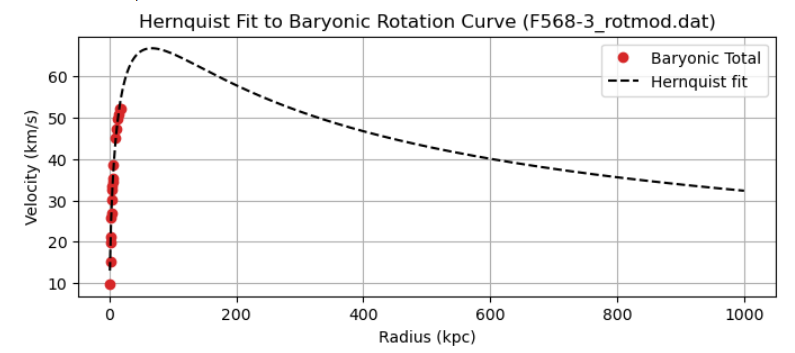

*Figure 1: Hernquist rotation curve comparison to observational data of the galaxy F568-3.*

The results here show that the model fits well with the data. For this, we determined (from the code) that $M_b$ = 2.764e+11 Msun and a  = 66.533 kpc, which seemed to be reasonable values, as I confirmed with my group members and supervisor as well.  Since we only have a limited amount of data, it only verifies the first couple of radii of the Hernquist model. We have extended the Hernquist model to 1000 kpc to see the general trend of this function. This is what we expect for a rotation curve; increasing radii will reach a peak and then fall off slowly. The next step is to plot the Hernquist baryon potential function. In the graph below, we have also plotted the integrated baryon function for comparison.

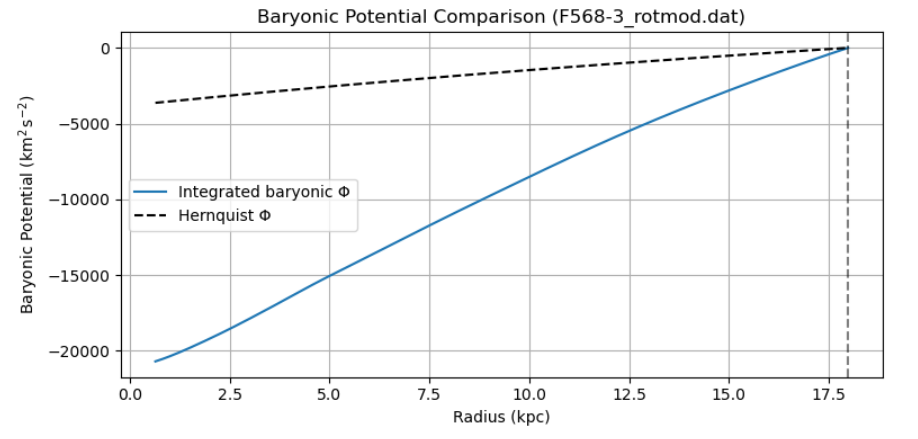

*Figure 2: Baryonic potential curve in comparison to Hernquist potential.*

The two potentials in Figure 2 don't quite match, but it was expected since the functions are slightly different. As for the intercept of the 2 functions, this was purely intentional when I normalized the graphs, so instead of the potential equal to zero at r = $\infty$, it is zero at r = r_max (dashed vertical line). Since both results were successful, we can now implement it into the Jeans model. A comparison of the integrated baryon and hernquist are shown in Figure 3.

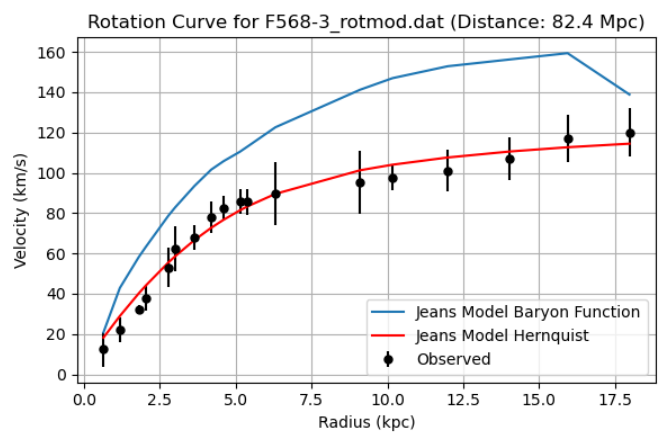

*Figure 3: Jeans model of integrated baryon potential and Hernquist potential.*

As predicted, the Hernquist model has a much better fit with the observed data than the baryon potential.

# 4. Now what? (What's next?)
## Plan for the next week

The plan is to combine all the functions together and export it as a .py file/script to make it more accessible. After this, we can implement this for all the galaxies in our selected SPARC dataset and analyze and compare the results. If all goes well, we can write and fix the MCMC code with the 'Data' team to start the Jeans code.

# 5. Bibliography

[1] Jia, Z., Jiang, F., Li, S., Li, R., Wang, J., & Zhu, L. (2026). An Enhanced Isothermal Jeans Approach to Constraining Dark Matter Self-Interactions from Galactic Kinematics. ArXiv.org. https://arxiv.org/abs/2601.17118

[2] ChatGPT - Baryonic Potential Function. (2025). ChatGPT. https://chatgpt.com/share/69895373-28ec-8005-9c5f-04447668b541